In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Copy of train_data.pkl')

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
411506,AOT1TMLA5PQSD,B00000JWNC,Roy F. Johnson,"[0, 0]","Of course the music on this CD is great, but I...",4.0,Excellent but song list is wrong,1188518400,"08 31, 2007"
611892,A1VXN0LM7NUQ3L,B00006LHW1,"N. Chandran ""vpcnk""","[5, 5]",... releasing a similar collection of non-ozzy...,5.0,superlative compilation! now how about ...,1135641600,"12 27, 2005"
675972,A1FML9FCUPV6TI,B0000CFWZ8,J. M. Zuurbier,"[4, 5]","I first bought BODY LANGUAGE back in November,...",5.0,Great album from Kylie!,1076630400,"02 13, 2004"
94908,A1M8JMW2145W84,B000001Y2U,greatkingrat,"[0, 0]",I must admit I didn't like this album at first...,4.0,Shock-schlock but worth a listen.,915580800,"01 6, 1999"
283470,A29LA71LFJPJ87,B000003C3V,J. McLemore,"[1, 4]",I got this album because I liked these guys fl...,3.0,Maybe I've outgrown this type of music,1353888000,"11 26, 2012"


In [ ]:
df = df.drop(['helpful', 'summary', 'unixReviewTime', 'reviewTime', 'reviewText'], axis=1)

In [ ]:
rows, columns = df.shape
print("No of rows: ", rows)
print("No of columns: ", columns)
df.info()

No of rows:  823194
No of columns:  4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 823194 entries, 411506 to 691849
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviewerID    823194 non-null  object 
 1   asin          823194 non-null  object 
 2   reviewerName  820953 non-null  object 
 3   overall       823194 non-null  float64
dtypes: float64(1), object(3)
memory usage: 31.4+ MB


In [ ]:
df.isna().sum()

reviewerID         0
asin               0
reviewerName    2241
overall            0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
rows, columns = df.shape
print("No of rows: ", rows)
print("No of columns: ", columns)
df.info()

No of rows:  820953
No of columns:  4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 820953 entries, 411506 to 691849
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviewerID    820953 non-null  object 
 1   asin          820953 non-null  object 
 2   reviewerName  820953 non-null  object 
 3   overall       820953 non-null  float64
dtypes: float64(1), object(3)
memory usage: 31.3+ MB


In [ ]:
df['overall'].describe()

count    820953.000000
mean          4.294784
std           1.073220
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

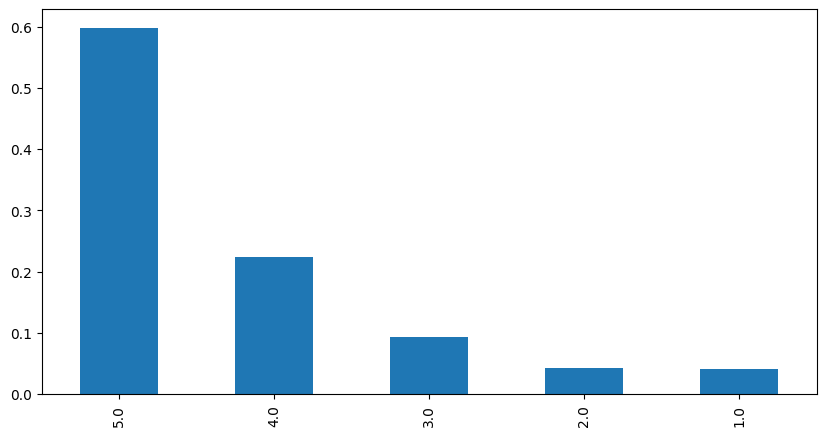

In [ ]:
plt.figure(figsize = (10,5))
df['overall'].value_counts(1).plot(kind='bar')
plt.show()

In [ ]:
print('Number of unique REVIEWERS in Raw data = ', df['reviewerID'].nunique())
print('Number of unique PRODUCTS in Raw data = ', df['asin'].nunique())

Number of unique REVIEWERS in Raw data =  75216
Number of unique ITEMS in Raw data =  64423


In [ ]:
most_rated = df.groupby('reviewerID').size().sort_values(ascending=False)[:10]
most_rated

reviewerID
A9Q28YTLYREO7     2641
A8IFUOL8S9BZC     1427
A2AIMXT9PLAM12    1321
A3HU0B9XUEVHIM    1320
A3KJ6JAZPH382D    1299
A2U49LUUY4IKQQ    1153
A2R6RA8FRBS608    1112
A2582KMXLK2P06    1071
A1J5KCZC8CMW9I    1002
A2WQY1B8ZS7QRZ     963
dtype: int64

In [ ]:
counts = df['reviewerID'].value_counts()
df_final = df[df['reviewerID'].isin(counts[counts >= 50].index)]

In [ ]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique REVIEWERS in the final data = ', df_final['reviewerID'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['asin'].nunique())

The number of observations in the final data = 229165
Number of unique REVIEWERS in the final data =  1852
Number of unique PRODUCTS in the final data =  54455


In [ ]:
final_ratings_matrix = df_final.pivot(index = 'reviewerID', columns ='asin', values = 'overall').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (1852, 54455)
given_num_of_ratings =  229165
possible_num_of_ratings =  100850660
density: 0.23%


asin,073890015X,0738900672,0738919039,0738920363,0739060287,0760135002,0767804341,0767816641,0769716903,0769720226,...,B00KDHSNV8,B00KDKM58C,B00KE3B7TG,B00KE3BAM0,B00KE7PBH6,B00KF1CWF0,B00KINIPI8,B00KPHL7K0,B00KTS9ZFY,B00L326LTI
reviewerID,,,,,,,,,,,,,,,,,,,,,
A103KNDW8GN92L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103W7ZPKGOCC9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10872FHIJAKKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10H24TDLK2VDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

final_ratings_matrix.head()

asin,073890015X,0738900672,0738919039,0738920363,0739060287,0760135002,0767804341,0767816641,0769716903,0769720226,...,B00KDHSNV8,B00KDKM58C,B00KE3B7TG,B00KE3BAM0,B00KE7PBH6,B00KF1CWF0,B00KINIPI8,B00KPHL7K0,B00KTS9ZFY,B00L326LTI
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def similar_reviewer(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows

        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score

In [ ]:
similar = similar_reviewer(3,final_ratings_matrix)[0][0:10]
similar

[1565, 1490, 1115, 999, 888, 0, 617, 1663, 1679, 723]

In [ ]:
similar_reviewer(3,final_ratings_matrix)[1][0:10]

[array([[0.1484357]]),
 array([[0.0944373]]),
 array([[0.09075589]]),
 array([[0.0866641]]),
 array([[0.08231895]]),
 array([[0.08131823]]),
 array([[0.08098001]]),
 array([[0.07850064]]),
 array([[0.07506013]]),
 array([[0.07490193]])]

In [ ]:
def recommendations(user_index, num_of_products, interactions_matrix):

    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_reviewer(user_index, interactions_matrix)[0]

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]

In [ ]:
recommendations(3,5,final_ratings_matrix)

['B000002J1E', 'B00005UK1F', 'B0006212KE', 'B00000AGAG', 'B0000067WP']